In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from numpy import mean
from numpy import std
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import LocalOutlierFactor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from numpy import set_printoptions

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('C:/Users/AJ/Documents/Workspace/Projects/Practice Proj/Diamond/diamond_treated.csv')
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth(%),table,length,width,depth(mm),price
0,1597,1.20,1,1,1,64.9,59.0,6.61,6.54,4.27,3011
1,7773,1.50,1,1,1,68.8,57.0,6.94,6.87,4.75,4284
2,11778,1.83,1,1,1,70.0,58.0,7.34,7.28,5.12,5083
3,12423,1.72,1,1,1,68.5,59.0,7.31,7.24,4.98,5240
4,13002,2.14,1,1,1,69.4,57.0,7.74,7.70,5.36,5405


In [3]:
diamond = data.loc[:, ['carat', 'cut', 'color', 'clarity', 'depth(%)', 'table',
       'length', 'width', 'depth(mm)', 'price']]
diamond.head()

,carat,cut,color,clarity,depth(%),table,length,width,depth(mm),price
0,1.20,1,1,1,64.9,59.0,6.61,6.54,4.27,3011
1,1.50,1,1,1,68.8,57.0,6.94,6.87,4.75,4284
2,1.83,1,1,1,70.0,58.0,7.34,7.28,5.12,5083
3,1.72,1,1,1,68.5,59.0,7.31,7.24,4.98,5240
4,2.14,1,1,1,69.4,57.0,7.74,7.70,5.36,5405


In [4]:
diamond.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53794.0,0.797780,0.473390,0.2,0.40,0.70,1.04,5.01
cut,53794.0,3.904134,1.116098,1.0,3.00,4.00,5.00,5.00
color,53794.0,4.406086,1.701117,1.0,3.00,4.00,6.00,7.00
clarity,53794.0,4.051920,1.646857,1.0,3.00,4.00,5.00,8.00
depth(%),53794.0,61.748080,1.429909,43.0,61.00,61.80,62.50,79.00
table,53794.0,57.458109,2.233679,43.0,56.00,57.00,59.00,95.00
length,53794.0,5.731214,1.120695,0.0,4.71,5.70,6.54,10.74
width,53794.0,5.734653,1.141209,0.0,4.72,5.71,6.54,58.90
depth(mm),53794.0,3.538714,0.705037,0.0,2.91,3.53,4.03,31.80
price,53794.0,3933.065082,3988.114460,326.0,951.00,2401.00,5326.75,18823.00


In [5]:
# Identifying and removing outliers

outliers = diamond.values
x = outliers[:, :-1] 
y = outliers[:, -1]
print(x.shape, y.shape)

lof = LocalOutlierFactor()
yhat = lof.fit_predict(x)

# select all rows that are not outliers
outliers = [x for x in yhat if x != 1]
print('outliers: ', len(outliers))

# assinging the dataset that are not outliers
mask = yhat != -1 
inputX = x[mask, :]
outputY = y[mask]

# summarize the shape of the updated dataset
print(inputX.shape, outputY.shape)

(53794, 9) (53794,)
outliers:  928
(52866, 9) (52866,)


In [6]:
# collecting the dataset without outliers
xDf = pd.DataFrame(inputX)
yDf = pd.DataFrame(outputY)

diamond = pd.concat([xDf, yDf], axis= 1)
diamond.columns = ['carat', 'cut', 'color', 'clarity', 'depth(%)', 'table', 'length', 'width', 'depth(mm)', 'price']
diamond

,carat,cut,color,clarity,depth(%),table,length,width,depth(mm),price
0,1.20,1.0,1.0,1.0,64.9,59.0,6.61,6.54,4.27,3011.0
1,1.50,1.0,1.0,1.0,68.8,57.0,6.94,6.87,4.75,4284.0
2,1.83,1.0,1.0,1.0,70.0,58.0,7.34,7.28,5.12,5083.0
3,1.72,1.0,1.0,1.0,68.5,59.0,7.31,7.24,4.98,5240.0
4,2.14,1.0,1.0,1.0,69.4,57.0,7.74,7.70,5.36,5405.0
...,...,...,...,...,...,...,...,...,...,...
52861,0.31,5.0,7.0,8.0,61.1,56.0,4.39,4.42,2.69,1251.0
52862,0.31,5.0,7.0,8.0,61.1,56.0,4.42,4.39,2.69,1310.0
52863,0.31,5.0,7.0,8.0,60.5,57.0,4.39,4.41,2.66,1917.0
52864,0.34,5.0,7.0,8.0,62.1,57.0,4.46,4.52,2.79,2287.0


# Feature Selection

In [10]:
# Tuning for the best possible number of features to select

sDiamond = diamond.values
a = sDiamond[:, :-1]
b = sDiamond[:, -1]

# get a list of models to evaluate
def getModels():
    models = dict()
    for i in range(2, 10):
        model = DecisionTreeRegressor()
        rfe = RFE(model, n_features_to_select=i)
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a given model using cross-validation
def evaluateModel(model, a, b):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1) 
    scores = cross_val_score(model, a, b, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = getModels()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluateModel(model, a, b)
    results.append(scores)
    names.append(name)
    print('for %s features, Mean Absolute Error is: %.1f, Std is: %.3f' % (name, mean(scores) * 100, std(scores)))

for 2 features, Mean Absolute Error is: -86530.0, Std is: 16.855
for 3 features, Mean Absolute Error is: -64528.3, Std is: 13.869
for 4 features, Mean Absolute Error is: -37631.1, Std is: 6.144
for 5 features, Mean Absolute Error is: -37849.6, Std is: 5.666
for 6 features, Mean Absolute Error is: -36842.0, Std is: 6.130
for 7 features, Mean Absolute Error is: -36613.1, Std is: 5.956
for 8 features, Mean Absolute Error is: -35926.2, Std is: 5.502
for 9 features, Mean Absolute Error is: -35493.8, Std is: 6.636


using all 9 features for modelling would be more ideal

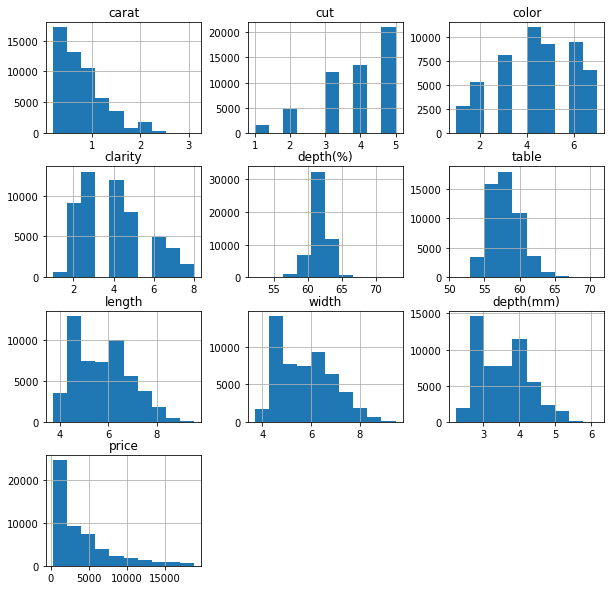

In [11]:
diamond.hist()
plt.gcf().set_size_inches(10,10)
plt.show()

# Data Transformation

In [7]:
# rescaling the data
rescale = diamond.values
g= rescale[:, 0:-1]
h= rescale[:, -1]

scaler = MinMaxScaler(feature_range=(0,1))
resc = scaler.fit_transform(g)
set_printoptions(precision=3)

# put transorm data into dataframe and display
rDiamond = pd.DataFrame(resc)
rDiamond.columns = ['carat', 'cut', 'color', 'clarity', 'depth(%)', 'table', 'length', 'width', 'depth(mm)']

# adding back the target output feature
rDiamond['price'] = diamond['price']
rDiamond.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,52866.0,0.206331,0.161709,0.0,0.068729,0.175258,0.288660,1.0
cut,52866.0,0.724067,0.278971,0.0,0.500000,0.750000,1.000000,1.0
color,52866.0,0.566262,0.283947,0.0,0.333333,0.500000,0.833333,1.0
clarity,52866.0,0.434724,0.234404,0.0,0.285714,0.428571,0.571429,1.0
depth(%),52866.0,0.461338,0.068365,0.0,0.425121,0.463768,0.497585,1.0
table,52866.0,0.324015,0.110820,0.0,0.250000,0.300000,0.400000,1.0
length,52866.0,0.346012,0.192027,0.0,0.170396,0.340792,0.483649,1.0
width,52866.0,0.356840,0.191628,0.0,0.181661,0.352941,0.494810,1.0
depth(mm),52866.0,0.332883,0.175687,0.0,0.173469,0.329082,0.459184,1.0
price,52866.0,3955.141792,3992.276513,326.0,956.000000,2438.000000,5369.750000,18823.0


In [8]:
# Normalizing the data

normalize = rDiamond.values
i = normalize[:, 0:-1]
j = normalize[:, -1]

nScaler = Normalizer()
norm = nScaler.fit_transform(i)
set_printoptions(precision=3)

# put transformed data into dataframe and display
nDiamond = pd.DataFrame(norm)
nDiamond.columns = ['carat', 'cut', 'color', 'clarity', 'depth(%)', 'table', 'length', 'width', 'depth(mm)']

# adding back the target output feature
nDiamond['price'] = diamond['price']
nDiamond.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,52866.0,0.137999,0.095824,0.0,0.049379,0.123762,0.204631,0.490167
cut,52866.0,0.499440,0.177549,0.0,0.387983,0.532944,0.634422,0.871138
color,52866.0,0.393763,0.190134,0.0,0.255385,0.406676,0.546718,0.837305
clarity,52866.0,0.304775,0.159358,0.0,0.187240,0.286400,0.415378,0.824507
depth(%),52866.0,0.328843,0.077625,0.0,0.279619,0.314801,0.363842,0.803276
table,52866.0,0.231561,0.091027,0.0,0.163376,0.217096,0.285219,0.767892
length,52866.0,0.235991,0.116265,0.0,0.124618,0.243487,0.333841,0.530109
width,52866.0,0.243724,0.115811,0.0,0.133124,0.251910,0.341102,0.522255
depth(mm),52866.0,0.227746,0.106628,0.0,0.126670,0.234050,0.317413,0.561700
price,52866.0,3955.141792,3992.276513,326.0,956.000000,2438.000000,5369.750000,18823.000000


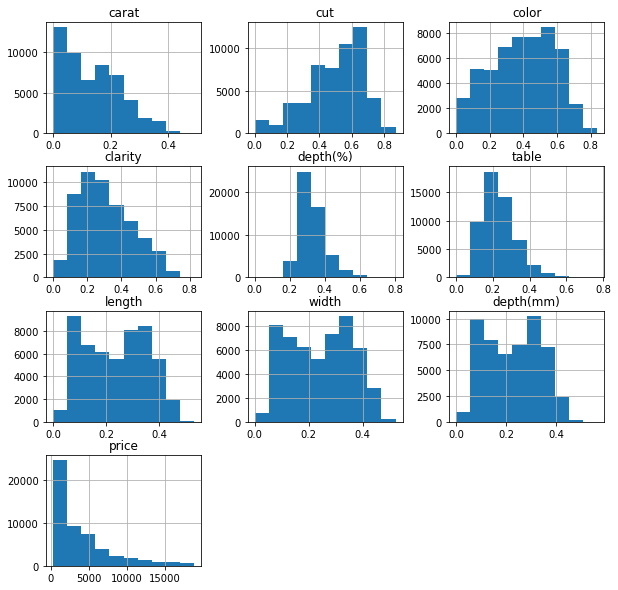

In [9]:
nDiamond.hist()
plt.gcf().set_size_inches(10,10)
plt.show()

In [13]:
# testing for accuracy of the selected features with DecisionTreeRegressor

tDiamond = nDiamond.values
x = tDiamond[:, 0:-1]
y = tDiamond[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

model = DecisionTreeRegressor()
model.fit(x_train, y_train) 

# evaluate the model
yhat = model.predict(x_test)

# evaluate predictions
accuracy = mean_absolute_error(y_test, yhat)
print('The mean absolute error of the selected features for modeling is: %.2f' % (accuracy*100))

The mean absolute error of the selected features for modeling is: 44538.92


In [14]:
# testing for accuracy of the selected features with DecisionTreeRegressor

tDiamond = nDiamond.values
x = tDiamond[:, 0:-1]
y = tDiamond[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

model = RandomForestRegressor()
model.fit(x_train, y_train) 

# evaluate the model
yhat = model.predict(x_test)

# evaluate predictions
accuracy = mean_absolute_error(y_test, yhat)
print('The mean absolute error of the selected features for modeling is: %.2f' % (accuracy*100))

The mean absolute error of the selected features for modeling is: 32870.48


In [15]:
# testing for accuracy of the selected features with DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

tDiamond = nDiamond.values
x = tDiamond[:, 0:-1]
y = tDiamond[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

model = LinearRegression()
model.fit(x_train, y_train) 

# evaluate the model
yhat = model.predict(x_test)

# evaluate predictions
accuracy = mean_absolute_error(y_test, yhat)
print('The mean absolute error of the selected features for modeling is: %.2f' % (accuracy*100))

The mean absolute error of the selected features for modeling is: 89802.59


In [16]:
# testing for accuracy of the selected features with DecisionTreeRegressor
from sklearn.metrics import accuracy_score

tDiamond = nDiamond.values
x = tDiamond[:, 0:-1]
y = tDiamond[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

model = DecisionTreeRegressor()
model.fit(x_train, y_train) 

# evaluate the model
yhat = model.predict(x_test)

# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('The accuracy of the selected features for modeling is: %.2f' % (accuracy*100))

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets